# OSMnx - Coimbra
### - Get Route Atributes


## 0 - Libraries

In [ ]:
!pip install plotly_express
!pip install osmnx

import pandas as pd
import geopandas as gpd

import matplotlib.cm as cm
import matplotlib.colors as colors

from shapely.geometry import Point, LineString
import plotly_express as px
import networkx as nx
import osmnx as ox
ox.config(use_cache=True, log_console=True)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 2.3 MB/s eta 0:00:00


<ipython-input-2-52328da041d7>:14: UserWarning: The `utils.config` function is deprecated and will be removed in a future release. Instead, use the `settings` module directly to configure a global setting's value. For example, `ox.settings.log_console=True`.
  ox.config(use_cache=True, log_console=True)


In [ ]:
!pip install arcgis
from arcgis.gis import GIS
from arcgis.geocoding import geocode, reverse_geocode
from arcgis.geometry import Point

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.7/3.7 MB 10.5 MB/s eta 0:00:00
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


ModuleNotFoundError: ignored

## 1 - Get Routes - Coimbra - OSMnx
- Get Route Atributes

### 1.0 - Prepare OSMnx

In [ ]:
def create_graph(loc, dist, transport_mode, loc_type="address"):
    """Transport mode = ‘walk’, ‘bike’, ‘drive’, ‘drive_service’, ‘all’, ‘all_private’, ‘none’"""
    if loc_type == "address":
            G = ox.graph_from_address(loc, dist=dist, network_type=transport_mode)
    elif loc_type == "points":
            G = ox.graph_from_point(loc, dist=dist, network_type=transport_mode )
    return G

def nodes_to_csv(G, savepath):
    unpacked = [pd.DataFrame({**{'node': node, **data}}, index=[i]) for i, (node, data) in enumerate(G.nodes(data=True))]
    df = pd.concat(unpacked)
    df.to_csv(savepath)
    return df

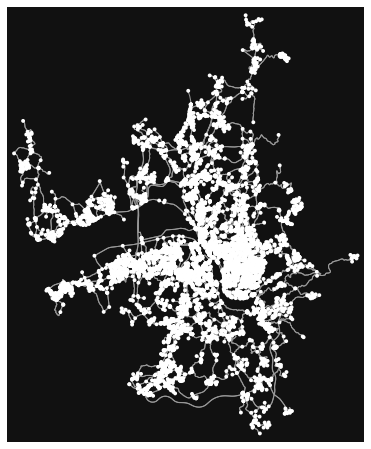

(<Figure size 576x576 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x213b70195b0>)

In [ ]:
#G = ox.graph_from_address('Coimbra', network_type='drive')
G = ox.graph_from_place('Coimbra', network_type='drive')
ox.plot_graph(G)

### 1.1 Get Nodes

In [ ]:
unpacked = [pd.DataFrame({**{'node': node, **data}}, index=[i]) for i, (node, data) in enumerate(G.nodes(data=True))]
df_nodes = pd.concat(unpacked)
df_nodes = df_nodes.set_index('node')
df_nodes.index.names = [None]
df_nodes

,y,x,osmid,highway,ref
99298281,40.223809,-8.401494,99298281,NaN,NaN
99308748,40.220961,-8.433713,99308748,NaN,NaN
99308822,40.224640,-8.442585,99308822,NaN,NaN
99308903,40.239411,-8.467051,99308903,NaN,NaN
99308913,40.240517,-8.470809,99308913,NaN,NaN
...,...,...,...,...,...
7746344456,40.199473,-8.403157,7746344456,NaN,NaN
7747396691,40.227436,-8.445518,7747396691,NaN,NaN
8000696840,40.297116,-8.446159,8000696840,NaN,NaN
8000696841,40.297175,-8.446098,8000696841,NaN,NaN


In [ ]:

df_nodes.loc[99298281]

y           40.2238
x          -8.40149
osmid      99298281
highway         NaN
ref             NaN
Name: 99298281, dtype: object

### 1.2 Get Routes

In [ ]:
df_routes = pd.DataFrame(list(G.edges(data=True)))
df2 = df_routes[2].apply(pd.Series)
df_routes = pd.concat([df_routes, df2], axis=1).drop(columns=2)
df_routes = df_routes.rename(columns={0: "node_0", 1: "node_1"})
df_routes

,node_0,node_1,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,ref,junction,bridge,tunnel,width,service,access
0,99298281,1362002415,"[58868219, 194607031]",True,2,Via Augusto Vaz Serra/Circular Externa,trunk,"[50, 70]",760.310,"LINESTRING (-8.401494 40.2238092, -8.402090299...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,99308748,1851893299,19787426,True,2,Circular Externa,trunk_link,NaN,290.643,"LINESTRING (-8.4337132 40.2209612, -8.43302210...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,99308822,249795673,23135192,True,NaN,Estrada da Cidreira,primary,NaN,51.090,"LINESTRING (-8.442584699999999 40.2246399, -8....",EN 111-1,NaN,NaN,NaN,NaN,NaN,NaN
3,99308822,1364450199,114751145,False,NaN,Estrada da Cidreira,primary,NaN,233.927,"LINESTRING (-8.442584699999999 40.2246399, -8....",EN 111-1,NaN,NaN,NaN,NaN,NaN,NaN
4,99308903,6264463862,668964707,False,NaN,NaN,unclassified,NaN,126.130,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15256,7747396691,1299121043,22330832,True,NaN,Estrada da Cidreira,primary,NaN,16.638,"LINESTRING (-8.4455183 40.2274363, -8.4455407 ...",NaN,roundabout,NaN,NaN,NaN,NaN,NaN
15257,8000696840,206243017,144589531,True,NaN,NaN,primary,90,13.748,NaN,EN 1;IC 2,NaN,NaN,NaN,NaN,NaN,NaN
15258,8000696840,8000696841,858226160,True,NaN,NaN,residential,NaN,8.290,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15259,8000696841,2539901552,"[247087160, 579470002]",True,NaN,Rua da Feira,primary,90,920.117,"LINESTRING (-8.446097999999999 40.2971749, -8....",EN 1;IC 2,NaN,NaN,NaN,NaN,NaN,NaN


### 1.3 - Join nodes and routes

In [ ]:
df_final = df_routes

def node_get(id, attribute):
    return df_nodes.loc[id][attribute]

df_final['node_0_y'] = df_final.apply(lambda x: node_get(x['node_0'], 'y'), axis=1)
df_final['node_0_x'] = df_final.apply(lambda x: node_get(x['node_0'], 'x'), axis=1)
df_final['node_1_y'] = df_final.apply(lambda x: node_get(x['node_1'], 'y'), axis=1)
df_final['node_1_x'] = df_final.apply(lambda x: node_get(x['node_1'], 'x'), axis=1)
df_final

,node_0,node_1,osmid,oneway,lanes,name,highway,maxspeed,length,geometry,...,junction,bridge,tunnel,width,service,access,node_0_y,node_0_x,node_1_y,node_1_x
0,99298281,1362002415,"[58868219, 194607031]",True,2,Via Augusto Vaz Serra/Circular Externa,trunk,"[50, 70]",760.310,"LINESTRING (-8.401494 40.2238092, -8.402090299...",...,NaN,NaN,NaN,NaN,NaN,NaN,40.223809,-8.401494,40.226494,-8.409492
1,99308748,1851893299,19787426,True,2,Circular Externa,trunk_link,NaN,290.643,"LINESTRING (-8.4337132 40.2209612, -8.43302210...",...,NaN,NaN,NaN,NaN,NaN,NaN,40.220961,-8.433713,40.221343,-8.430380
2,99308822,249795673,23135192,True,NaN,Estrada da Cidreira,primary,NaN,51.090,"LINESTRING (-8.442584699999999 40.2246399, -8....",...,NaN,NaN,NaN,NaN,NaN,NaN,40.224640,-8.442585,40.224182,-8.442557
3,99308822,1364450199,114751145,False,NaN,Estrada da Cidreira,primary,NaN,233.927,"LINESTRING (-8.442584699999999 40.2246399, -8....",...,NaN,NaN,NaN,NaN,NaN,NaN,40.224640,-8.442585,40.226315,-8.444021
4,99308903,6264463862,668964707,False,NaN,NaN,unclassified,NaN,126.130,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.239411,-8.467051,40.240458,-8.466478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15256,7747396691,1299121043,22330832,True,NaN,Estrada da Cidreira,primary,NaN,16.638,"LINESTRING (-8.4455183 40.2274363, -8.4455407 ...",...,roundabout,NaN,NaN,NaN,NaN,NaN,40.227436,-8.445518,40.227550,-8.445635
15257,8000696840,206243017,144589531,True,NaN,NaN,primary,90,13.748,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.297116,-8.446159,40.296993,-8.446151
15258,8000696840,8000696841,858226160,True,NaN,NaN,residential,NaN,8.290,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,40.297116,-8.446159,40.297175,-8.446098
15259,8000696841,2539901552,"[247087160, 579470002]",True,NaN,Rua da Feira,primary,90,920.117,"LINESTRING (-8.446097999999999 40.2971749, -8....",...,NaN,NaN,NaN,NaN,NaN,NaN,40.297175,-8.446098,40.305250,-8.448338


### 1.4 Save to CSV

In [ ]:
df_final.to_csv("./routes.csv",sep=';')

### Example of path

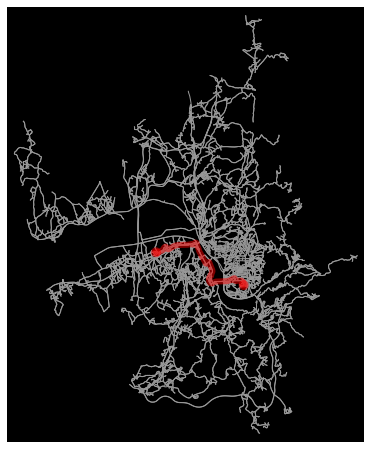

In [ ]:
start_sample = df_nodes.sample()
end_sample = df_nodes.sample()

G = ox.add_edge_speeds(G) #Impute
G = ox.add_edge_travel_times(G) #Travel time
start = (float(start_sample['y']),float(start_sample['x']))
end = (float(end_sample['y']),float(end_sample['x']))
start_node = ox.get_nearest_node(G, start)
end_node = ox.get_nearest_node(G, end)
# Calculate the shortest path
route = nx.shortest_path(G, start_node, end_node, weight='travel_time')
#Plot the route and street networks
ox.plot_graph_route(G, route, route_linewidth=6, node_size=0, bgcolor='k' );

### Centrality

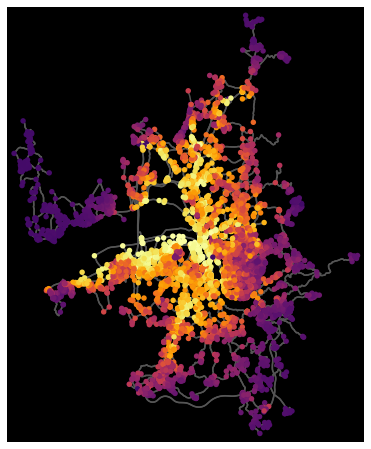

In [ ]:

# node closeness centrality
node_centrality = nx.closeness_centrality(G)
df = pd.DataFrame(data=pd.Series(node_centrality).sort_values(), columns=['cc'])
df['colors'] = ox.plot.get_colors(n=len(df), cmap='inferno', start=0.2)
df = df.reindex(G.nodes())
nc = df['colors'].tolist()
fig, ax = ox.plot_graph(G, bgcolor='k', node_size=30, node_color=nc, node_edgecolor='none', node_zorder=2,
                        edge_color='#555555', edge_linewidth=1.5, edge_alpha=1)

In [ ]:
df

,cc,colors
99298281,0.024024,"(0.951546, 0.896226, 0.365627, 1.0)"
99308748,0.027983,"(0.982257, 0.994109, 0.631017, 1.0)"
99308821,0.023911,"(0.953215, 0.888942, 0.351369, 1.0)"
99308822,0.023660,"(0.95872, 0.866624, 0.31082, 1.0)"
99308831,0.023579,"(0.960626, 0.859069, 0.29801, 1.0)"
...,...,...
8105037695,0.019827,"(0.801871, 0.258674, 0.283099, 1.0)"
8105091064,0.019572,"(0.752794, 0.225706, 0.319085, 1.0)"
8105091068,0.021030,"(0.961293, 0.488716, 0.084289, 1.0)"
8105091069,0.021447,"(0.980824, 0.572209, 0.028508, 1.0)"


In [ ]:
pd.Series(node_centrality)

99298281      0.028169
1362002415    0.030796
99308748      0.037710
1851893299    0.039900
99308822      0.027690
                ...   
7502932914    0.025947
7502932920    0.027383
7502932919    0.026645
7569605560    0.031260
7589711292    0.027311
Length: 1999, dtype: float64

### Other Experiments

In [ ]:
places = ox.geocode_to_gdf(['Coimbra', 'Montemor-o-Velho', 'Figueira da Foz','Cantanhede','Mealhada'])
print(type(places))
places = ox.project_gdf(places)
print(type(places))
ax = places.plot()
_ = ax.axis('off')

## 2 - Get POI (Points of Interest) - Coimbra - ArcGIS

### 2.0

In [ ]:
gis = GIS()

In [ ]:
start_sample = df_nodes.sample()

y = float(start_sample['y'])
x = float(start_sample['x'])
location ={
    'Y' : y,
    'X' : x
}

In [ ]:
list_poi = ["POI",
 "Arts and Entertainment",
 "Amusement Park",
 #"Aquariu",
 "Art Gallery",
 "Art Museum",
 "Billiards",
 "Bowling Alley",
 "Casino",
 "Cinema",
 "Historical Monument",
 "History Museum",
 "Indoor Sports",
 "Jazz Club",
 "Landmark",
 "Library",
 "Live Music",
 "Museum",
 "Other Arts and Entertainment",
 "Performing Arts",
 "Ruin","Science Museum",
 "Tourist Attraction",
 "Wild Animal Park",
 "Zoo",
 "Education",
 "College",
 "Fine Arts School",
 "Other Education",
 "School","Vocational School",
 "Food","African Food",
 "American Food",
 "Argentinean Food",
 "Australian Food",
 "Austrian Food",
 "Bakery",
 "BBQ and Southern Food",
 "Belgian Food",
 "Bistro",
 "Brazilian Food",
 "Breakfast",
 "Brewpub",
 "British Isles Food",
 "Burgers",
 "Cajun and Creole Food",
 "Caribbean Food",
 "Chicken Restaurant",
 "Chilean Food",
 "Chinese Food",
 "Coffee Shop",
 "Continental Food",
 "Creperie",
 "East European Food",
 "Fast Food",
 "Filipino Food",
 "French Food",
 "Fusion Food",
 "German Food",
 "Greek Food",
 "Grill",
 "Ice Cream Shop",
 "Indian Food",
 "Indonesian Food",
 "International Food",
 "Irish Food",
 "Italian Food",
 "Japanese Food",
 "Korean Food",
 "Latin American Food",
 "Malaysian Food",
 "Mexican Food",
 "Middle Eastern Food",
 "Moroccan Food",
 "Other Restaurant",
 "Pastries",
 "Pizza",
 "Polish Food",
 "Portuguese Food",
 "Russian Food",
 "Sandwich Shop",
 "Scandinavian Food",
 "Seafood",
 "Snacks",
 "South American Food",
 "Southeast Asian Food",
 "Spanish Food",
 "Steak House",
 "Sushi",
 "Swiss Food",
 "Tapas",
 "Thai Food",
 "Turkish Food",
 "Vegetarian Food",
 "Vietnamese Food",
 "Winery",
 "Land Features",
 "Atoll",
 "Basin",
 "Butte",
 "Canyon",
 "Cape",
 "Cave",
 "Cliff",
 "Desert",
 "Dune",
 "Flat",
 "Forest",
 "Glacier",
 "Grassland",
 "Hill",
 "Island",
 "Isthmus",
 "Lava",
 "Marsh",
 "Meadow",
 "Mesa",
 "Mountain",
 "Mountain Range",
 "Oasis",
 "Other Land Feature",
 "Peninsula",
 "Plain",
 "Plateau",
 "Point",
 "Ravine",
 "Ridge",
 "Rock",
 "Scrubland",
 "Swamp",
 "Valley",
 "Volcano",
 "Wetland",
 "Nightlife Spot",
 "Bar or Pub",
 "Dancing","Karaoke",
 "Night Club",
 "Nightlife",
 "Parks and Outdoors",
 "Basketball",
 "Beach",
 "Campground",
 "Diving Center",
 "Fishing",
 "Garden",
 "Golf Course",
 "Golf Driving Range",
 "Harbor",
 "Hockey",
 "Ice Skating Rink",
 "Nature Reserve",
 "Other Parks and Outdoors",
 "Park",
 "Racetrack",
 "Scenic Overlook",
 "Shooting Range",
 "Ski Lift",
 "Ski Resort",
 "Soccer",
 "Sports Center",
 "Sports Field",
 "Swimming Pool",
 "Tennis Court",
 "Trail",
 "Wildlife Reserve",
 "Professional and Other Places",
 "Ashram",
 "Banquet Hall",
 "Border Crossing","Building",
 "Business Facility",
 "Cemetery",
 "Church",
 "City Hall",
 "Civic Center",
 "Convention Center",
 "Court House",
 "Dentist",
 "Doctor",
 "Embassy",
 "Factory",
 "Farm",
 "Fire Station",
 "Government Office",
 "Gurdwara",
 "Hospital",
 "Industrial Zone",
 "Livestock",
 "Medical Clinic",
 "Military Base",
 "Mine",
 "Mosque",
 "Observatory",
 "Oil Facility",
 "Orchard",
 "Other Professional Place",
 "Other Religious Place",
 "Place of Worship",
 "Plantation",
 "Police Station",
 "Post Office",
 "Power Station",
 "Prison",
 "Public Restroom",
 "Radio Station",
 "Ranch",
 "Recreation Facility",
 "Religious Center",
 "Scientific Research",
 "Shrine",
 "Storage",
 "Synagogue",
 "Telecom",
 "Temple",
 "Tower",
 "Veterinarian",
 "Vineyard",
 "Warehouse",
 "Water Tank",
 "Water Treatment",
 "Residence",
 "Estate",
 "House",
 "Nursing Home",
 "Residential Area",
 "Shops and Service",
 "ATM",
 "Auto Dealership",
 "Auto Maintenance",
 "Auto Parts",
 "Bank",
 "Bookstore",
 "Butcher",
 "Candy Store",
 "Car Wash",
 "Childrens Apparel",
 "Clothing Store",
 "Consumer Electronics Store",
 "Convenience Store",
 "Department Store",
 "Electrical",
 "Fitness Center",
 "Flea Market",
 "Food and Beverage Shop",
 "Footwear",
 "Furniture Store",
 "Gas Station",
 "Grocery",
 "Home Improvement Store",
 "Market",
 "Mens Apparel",
 "Mobile Phone Shop",
 "Motorcycle Shop",
 "Office Supplies Store",
 "Other Shops and Service",
 "Pet Store",
 "Pharmacy",
 "Repair Services",
 "Shopping Center",
 "Spa",
 "Specialty Store",
 "Sporting Goods Store",
 "Tire Store",
 "Toy Store",
 "Used Car Dealership",
 "Wholesale Warehouse",
 "Womens Apparel",
 "Travel and Transport",
 "Airport",
 "Bed and Breakfast",
 "Bridge",
 "Bus Station",
 "Cargo Center",
 "Dock",
 "Ferry",
 "Heliport",
 "Highway Exit",
 "Hostel",
 "Hotel",
 "Marina",
 "Metro Station",
 "Motel",
 "Other Travel",
 "Parking",
 "Pier",
 "Port",
 "Railyard",
 "Rental Cars",
 "Resort",
 "Rest Area",
 "Taxi",
 "Tollbooth",
 "Tourist Information",
 "Train Station",
 "Transportation Service",
 "Truck Stop",
 "Tunnel",
 "Weigh Station",
 "Water Features",
 "Bay",
 "Canal",
 "Channel",
 "Cove",
 "Dam",
 "Delta",
 "Estuary",
 "Fjord",
 "Gulf",
 "Hot Spring",
 "Irrigation",
 "Jetty",
 "Lagoon",
 "Lake",
 "Ocean",
 "Other Water Feature",
 "Reef",
 "Reservoir",
 "Sea",
 "Sound",
 "Spring",
 "Strait",
 "Stream",
 "Waterfall",
 "Well",
 "Wharf"]

In [ ]:
from progressbar import ProgressBar
pbar = ProgressBar()

df_poi = pd.DataFrame()
for poi in pbar(list_poi):
    address = {
        'category': poi,
        'location': location
    }
    df_poi = pd.concat([df_poi, pd.DataFrame(geocode(address))])

100% |########################################################################|


In [ ]:
#df = df.drop_duplicates()
df_poi = df
df_poi.reset_index()
df2 = df_poi['attributes'].apply(pd.Series)
df_poi = pd.concat([df_poi, df2], axis=1).drop(columns='attributes')
df_poi.reset_index()

,index,address,location,score,extent,Loc_name,Status,Score,Match_addr,LongLabel,...,Distance,X,Y,DisplayX,DisplayY,Xmin,Xmax,Ymin,Ymax,ExInfo
0,0,Estação de Autocarros,"{'x': -8.631469999999979, 'y': 39.91625000000005}",100,"{'xmin': -8.63646999999998, 'ymin': 39.9112500...",World,M,100,Estação de Autocarros,"Estação de Autocarros, 3100, Pombal, Leiria, PRT",...,36033.865813,-8.63147,39.91625,-8.631470,39.916250,-8.636470,-8.626470,39.911250,39.921250,
1,1,Terminal Rodoviário de Leiria,"{'x': -8.805059999999969, 'y': 39.74581000000006}",100,"{'xmin': -8.81005999999997, 'ymin': 39.7408100...",World,M,100,Terminal Rodoviário de Leiria,"Terminal Rodoviário de Leiria, Avenida Heróis ...",...,59699.101316,-8.80506,39.74581,-8.805060,39.745810,-8.810060,-8.800060,39.740810,39.750810,
2,2,Terminal Rodoviário de Fátima,"{'x': -8.680189999999925, 'y': 39.63151000000005}",100,"{'xmin': -8.685189999999926, 'ymin': 39.626510...",World,M,100,Terminal Rodoviário de Fátima,"Terminal Rodoviário de Fátima, Avenida Dom Jos...",...,67210.283878,-8.68019,39.63151,-8.680190,39.631510,-8.685190,-8.675190,39.626510,39.636510,
3,3,Terminal Rodoviário Proença-a-Nova,"{'x': -7.920599999999979, 'y': 39.74958000000004}",100,"{'xmin': -7.925599999999979, 'ymin': 39.744580...",World,M,100,Terminal Rodoviário Proença-a-Nova,"Terminal Rodoviário Proença-a-Nova, 6150, Proe...",...,68530.100076,-7.92060,39.74958,-7.920600,39.749580,-7.925600,-7.915600,39.744580,39.754580,
4,4,Rodoviária Tejo,"{'x': -8.213899999999967, 'y': 39.46311000000003}",100,"{'xmin': -8.218899999999968, 'ymin': 39.458110...",World,M,100,Rodoviária Tejo,"Rodoviária Tejo, 2200, Abrantes, Santarém, PRT",...,85616.086559,-8.21390,39.46311,-8.213900,39.463110,-8.218900,-8.208900,39.458110,39.468110,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6515,15,Terminal Rodoviário de Caldas da Rainha,"{'x': -9.134559995282501, 'y': 39.406169982823...",100,"{'xmin': -9.139191442999964, 'ymin': 39.401142...",World,M,100,Terminal Rodoviário de Caldas da Rainha,"Terminal Rodoviário de Caldas da Rainha, Rua C...",...,106646.873060,-9.13456,39.40617,-9.134191,39.406143,-9.139191,-9.129191,39.401143,39.411143,
6516,16,Estação Rodoviária,"{'x': -8.054209999999955, 'y': 41.12411000000003}",100,"{'xmin': -8.059209999999956, 'ymin': 41.119110...",World,M,100,Estação Rodoviária,"Estação Rodoviária, N321, 4640-014, Eiriz, Bai...",...,107037.291211,-8.05421,41.12411,-8.054210,41.124110,-8.059210,-8.049210,41.119110,41.129110,
6517,17,Terminal Rodoviário de Santarém,"{'x': -8.68778999999995, 'y': 39.236560000000054}",100,"{'xmin': -8.69278999999995, 'ymin': 39.2315600...",World,M,100,Terminal Rodoviário de Santarém,"Terminal Rodoviário de Santarém, Avenida do Br...",...,110133.139447,-8.68779,39.23656,-8.687790,39.236560,-8.692790,-8.682790,39.231560,39.241560,
6518,18,Terminal Rodoviário da Trofa,"{'x': -8.546739999999943, 'y': 41.33745000000005}",100,"{'xmin': -8.551739999999944, 'ymin': 41.332450...",World,M,100,Terminal Rodoviário da Trofa,"Terminal Rodoviário da Trofa, 4785, Paradela, ...",...,125540.850066,-8.54674,41.33745,-8.546740,41.337450,-8.551740,-8.541740,41.332450,41.342450,


In [ ]:
df_poi.columns

Index(['address', 'location', 'score', 'extent', 'Loc_name', 'Status', 'Score',
       'Match_addr', 'LongLabel', 'ShortLabel', 'Addr_type', 'Type',
       'PlaceName', 'Place_addr', 'Phone', 'URL', 'Rank', 'AddBldg', 'AddNum',
       'AddNumFrom', 'AddNumTo', 'AddRange', 'Side', 'StPreDir', 'StPreType',
       'StName', 'StType', 'StDir', 'BldgType', 'BldgName', 'LevelType',
       'LevelName', 'UnitType', 'UnitName', 'SubAddr', 'StAddr', 'Block',
       'Sector', 'Nbrhd', 'District', 'City', 'MetroArea', 'Subregion',
       'Region', 'RegionAbbr', 'Territory', 'Zone', 'Postal', 'PostalExt',
       'Country', 'LangCode', 'Distance', 'X', 'Y', 'DisplayX', 'DisplayY',
       'Xmin', 'Xmax', 'Ymin', 'Ymax', 'ExInfo'],
      dtype='object')

In [ ]:
#, 'Subregion','Region']
df_poi['Place_addr'].unique()

array(['Pombal, Leiria', 'Avenida Heróis de Angola, Leiria',
       'Avenida Dom José Alves Correia da Silva, Fátima, Ourém, Santarém',
       'Proença-a-Nova, Castelo Branco', 'Abrantes, Santarém',
       'Rua 25 de Abril, Alcanena, Santarém',
       'Avenida da Lameira, Fornos de Algodres, Guarda',
       'Rua Poeta João Ruiz, Castelo Branco', 'N18-8, Castelo Branco',
       'Rua do Duque de Loulé, Porto',
       'Campo de Vinte e Quatro de Agosto, Porto',
       'Rua de José Falcão 190, Porto',
       'Praça do General Humberto Delgado 329, Porto',
       'Rua do Régulo Megauanha, Porto', 'Largo Ferreira Lapa, Porto',
       'Rua Coronel Soeiro de Brito 35, Caldas da Rainha, Leiria',
       'N321, Eiriz, Baião, Porto', 'Avenida do Brasil, Santarém',
       'Paradela, Trofa, Porto',
       'Rua dos Bombeiros Voluntários, Lourinhã, Lisboa'], dtype=object)

In [ ]:
df_poi.query("'City'=='Coimbra', 'Subregion','Region'")

#### Visualization

In [ ]:
map = gis.map("Coimbra", 13)
map

MapView(layout=Layout(height='400px', width='100%'))

In [ ]:
for poi in coimbraPOI:
    map.draw(poi)

In [ ]:
map.draw(coimbraPOI[0])

### Get address name with one Point

(Bom para adicionar ao **routs.csv**)

In [ ]:
address = reverse_geocode(location = unknown_pt)
address

{'address': {'Match_addr': 'Rua do Pinheiro Manso, 3045, São Martinho do Bispo, Coimbra',
  'LongLabel': 'Rua do Pinheiro Manso, 3045, São Martinho do Bispo, Coimbra, PRT',
  'ShortLabel': 'Rua do Pinheiro Manso',
  'Addr_type': 'StreetName',
  'Type': '',
  'PlaceName': '',
  'AddNum': '',
  'Address': 'Rua do Pinheiro Manso',
  'Block': '',
  'Sector': '',
  'Neighborhood': 'São Martinho do Bispo',
  'District': '',
  'City': 'Coimbra',
  'MetroArea': '',
  'Subregion': 'Coimbra',
  'Region': 'Coimbra',
  'Territory': '',
  'Postal': '3045',
  'PostalExt': '',
  'CountryCode': 'PRT'},
 'location': {'x': -8.454387680531552,
  'y': 40.21060773796732,
  'spatialReference': {'wkid': 4326, 'latestWkid': 4326}}}